In [ ]:
# function heatedAreaPerHousehold is:
# input:  building heated area heatedArea, number of households in building numberOfHouseholds, pseudo random number generator r
# output:  list of household areas with the length of numberOfHouseholds and the sum of heatedArea
# Create list heatedAreaPerHouseholdList
# Set remainingArea to heatedArea
# Set remainingHouseholds to numberOfHouseholds
# For each household in numberOfHouseholds do
#   Set newValue to getNewHouseholdSize(r)
#   While not isValid (newValue, remainingArea, remainingHouseholds - 1) do
#     Set newValue to getNewHouseholdSize(r)
#   Set remainingArea to remainingArea - newValue
#   Decrement remainingHouseholds
#   Add newValue to heatedAreaPerHouseholdList
# Add remainingArea to heatedAreaPerHouseholdList

In [ ]:
# function getNewHouseholdSize is: 
# input:  pseudo random number generator r array of statistical household area distribution householdDistribution
# output:  A new household area depending on the statistical data  
# Set n to random integer number in interval [0...1000) 
# Set tempSum to 0 
# for each i in 0 ... 9  
#   Set tempSum to tempSum + householdDistribution[i] 
#   if n < tempSum 
#       Set min to 20 + i * 20 
#       Return random double number in interval [0... 20) + min

In [ ]:
# function isValid is: 
# input:  new area value n 
# remaining area of the building remainingArea 
# remaining number of households remainingHouseholds 
# output:  
# true if the new area value can be placed in the building, false otherwise  
# Return (remainingArea - n) / remainingHouseholds > 40 and (remainingArea - n) / remainingHouseholds < 160

In [1]:
# function getNrOfOccupantsForHeatedArea is: 
# input:  
# pseudo number generator r 
# area a 
# occupants distribution table occupantsDistribution as 2-dimensional array 
# output:  number of occupants for the heated area  
# Set index to rounded down ((a - 20) / 20) 
# if index > 9  set index to 9 
# Set n to random integer number in interval [0...1000) 
# Set tempSum to 0 
# for each i in 0 ... 9  
#   Set tempSum to tempSum + occupantsDistribution[index][i] 
#   if n < tempSum 
#       Set nrOfOccupants to i + 1 
#       if nrOfOccupants == 6  
#           Set nrOfOccupants to 6 + random integer from 0 ..2 
# Return nrOfOccupants

# My way: use the average living area per people

## Try to estimate the distribution of the average living area

In [ ]:
import numpy as np
area_pmf = np.array([0.053, 0.173, 0.228, 0.164, 0.115, 0.106, 0.067, 0.035, 0.022, 0.037])

area_of_occupants_pmf_ = np.array([
    [0.114, 0.009, 0.005, 0.003, 0.003, 0.006],
    [0.303, 0.103, 0.051, 0.026, 0.024, 0.033],
    [0.27,  0.227, 0.195, 0.132, 0.122, 0.123],
    [0.136, 0.196, 0.182, 0.164, 0.176, 0.175],
    [0.071, 0.152, 0.151, 0.145, 0.136, 0.143],
    [0.05,  0.137, 0.157, 0.175, 0.15, 0.137],
    [0.026, 0.08,  0.106, 0.136, 0.127, 0.107],
    [0.012, 0.038, 0.057, 0.081, 0.083, 0.071],
    [0.007, 0.023, 0.036, 0.052, 0.059, 0.056],
    [0.012, 0.035, 0.058, 0.086, 0.12, 0.149]
    ])

occupants_of_area_pmf = np.array([
    [0.927059110633631, 0.0529605807557342, 0.0119022574036725, 0.00474706475811662, 0.00158999086491576, 0.00174380062515019],
    [0.761194877739394, 0.181579795144092, 0.0364279365700298, 0.0136359191046399, 0.00415896036058322, 0.00300179198582519],
    [0.512811008795322, 0.303789200431076, 0.106266355674648, 0.0526615859308795, 0.0159691564637147, 0.00850214858077879],
    [0.358293329104416, 0.363701087755891, 0.138184977214084, 0.0910701239682177, 0.031944014860933, 0.0168073750224712],
    [0.266522381688543, 0.401267809660991, 0.162788604056836, 0.114767723296762, 0.0350901526256233, 0.0195637594155317],
    [0.204813755471113, 0.395424812742793, 0.185501976489373, 0.15127721131892, 0.0424552507968956, 0.0205258156477669],
    [0.168862937598044, 0.365832764140915, 0.197957376938244, 0.185682898906593, 0.0565052837292521, 0.0251583668682791],
    [0.14553198225371, 0.335057478640706, 0.204302662371277, 0.212448500250279, 0.0705366527052253, 0.0321241498708674],
    [0.136964020398921, 0.31973480948938, 0.20596871605524, 0.216531388935867, 0.0807784551438265, 0.0400248800547543],
    [0.137652389308018, 0.292968865816548, 0.196771219950028, 0.212200847962437, 0.0966134062160552, 0.0637966399555804]])

# Round to 3 decimal places
occupants_of_area_pmf = np.round(occupants_of_area_pmf, 3)

household_size = np.array([30, 50, 70, 90, 110, 130, 150, 170, 190, 210])  # in square meters
number_of_occupants = np.array([1, 2, 3, 4, 5, 7 ])  # number of occupants
area_per_occupants = np.zeros((len(household_size), len(number_of_occupants)))
for i in range(len(household_size)):
    for j in range(len(number_of_occupants)):
        area_per_occupants[i][j] = household_size[i] / number_of_occupants[j]

In [52]:
import pandas as pd
import numpy as np

# Convert to DataFrame for better display
df_area_per_occupants = pd.DataFrame(
    area_per_occupants,
    index=[f"{size}m²" for size in household_size],
    columns=[f"{n}p" for n in number_of_occupants]
)

print("="*70)
print("AREA PER OCCUPANT (m²/person)")
print("="*70)
print(df_area_per_occupants.round(1))

print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(df_area_per_occupants.describe().round(2))

print("\n" + "="*70)
print("OVERALL STATISTICS")
print("="*70)
print(f"Overall Mean:   {area_per_occupants.mean():.2f} m²/person")
print(f"Overall Median: {np.median(area_per_occupants):.2f} m²/person")
print(f"Overall Std:    {area_per_occupants.std():.2f} m²/person")
print(f"Overall Min:    {area_per_occupants.min():.2f} m²/person")
print(f"Overall Max:    {area_per_occupants.max():.2f} m²/person")
print("="*70)

print("\n" + "="*70)
print("QUANTILE STATISTICS")
print("="*70)

# Define quantiles to calculate
quantiles = [0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]

print(f"{'Quantile':<15} {'Value (m²/person)':<20}")
print("-" * 35)
for q in quantiles:
    value = np.quantile(area_per_occupants, q)
    print(f"{q:>6.0%} ({q:.2f})     {value:>8.2f}")

print("="*70)

AREA PER OCCUPANT (m²/person)
          1p     2p    3p    4p    5p    7p
30m²    30.0   15.0  10.0   7.5   6.0   4.3
50m²    50.0   25.0  16.7  12.5  10.0   7.1
70m²    70.0   35.0  23.3  17.5  14.0  10.0
90m²    90.0   45.0  30.0  22.5  18.0  12.9
110m²  110.0   55.0  36.7  27.5  22.0  15.7
130m²  130.0   65.0  43.3  32.5  26.0  18.6
150m²  150.0   75.0  50.0  37.5  30.0  21.4
170m²  170.0   85.0  56.7  42.5  34.0  24.3
190m²  190.0   95.0  63.3  47.5  38.0  27.1
210m²  210.0  105.0  70.0  52.5  42.0  30.0

SUMMARY STATISTICS
           1p      2p     3p     4p     5p     7p
count   10.00   10.00  10.00  10.00  10.00  10.00
mean   120.00   60.00  40.00  30.00  24.00  17.14
std     60.55   30.28  20.18  15.14  12.11   8.65
min     30.00   15.00  10.00   7.50   6.00   4.29
25%     75.00   37.50  25.00  18.75  15.00  10.71
50%    120.00   60.00  40.00  30.00  24.00  17.14
75%    165.00   82.50  55.00  41.25  33.00  23.57
max    210.00  105.00  70.00  52.50  42.00  30.00

OVERALL STATIST

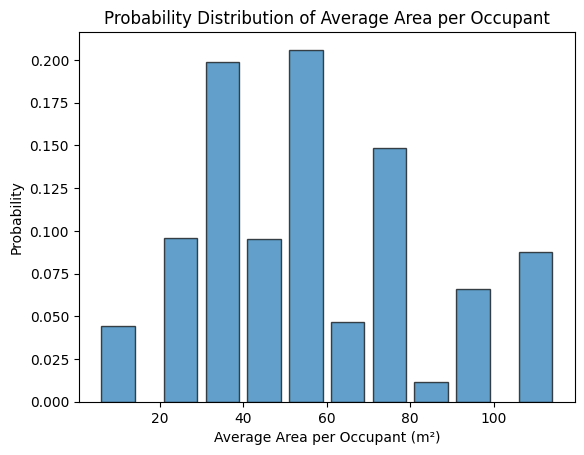

Expected average area per occupant: 56.49


In [79]:
# Define bins more explicitly
bins = np.concatenate([[0], np.arange(20, 110, 10), [np.inf]])

# Get bin indices
bin_classes = np.digitize(area_per_occupants, bins) - 1  # -1 to make 0-indexed

# Calculate bin averages
bin_averages = (bins[:-1] + bins[1:]) / 2
bin_averages[-1] = bins[-2] + 10  # Handle the inf case

# Calculate joint probabilities (vectorized)
joint_prob = occupants_of_area_pmf * area_pmf[:, np.newaxis]

# Sum probabilities by bin (vectorized)
final_pmf = np.bincount(bin_classes.flatten(), 
                        weights=joint_prob.flatten(), 
                        minlength=len(bin_averages))

import matplotlib.pyplot as plt

plt.bar(bin_averages, final_pmf, width=8, alpha=0.7, edgecolor='black')
plt.xlabel('Average Area per Occupant (m²)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Average Area per Occupant')
plt.show()

expectation = np.sum(bin_averages * final_pmf)

print(f"Expected average area per occupant: {expectation:.2f}")
